# Life expectancy and GDP

This is my second portfolio project that I did during my Data Scientist Career Path training. The dataset for this project can be found [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who). 
The data is arranged by country, year, life expectancy and GDP. My aim for this project is to investigate if there is a correlation between GDP and life expectancy. To achieve that goal, I am going to do by:  

1.   Visualising the relationship between life expectancy and GDP using a scatter plot
AND
2.   By tracking life expectancy and GDP across the years for each country and seeing if they correlate.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv = pd.read_csv('all_data.csv')
# Lets see the first 5 rows of dataset
print(csv.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


# Let's see how many unique countries we have(country quantity)

In [3]:
years = csv.Year.nunique()
num_of_countries = csv.Country.nunique()
data_len = len(csv)
print("Number of years - {}".format(years), '\n', "Number of Countries - {}".format(num_of_countries))


#Rename life expectancy column to something easier
csv.rename(columns={'Life expectancy at birth (years)': 'YearsOfLife'}, inplace=True)
print(csv.head())

Number of years - 16 
 Number of Countries - 6
  Country  Year  YearsOfLife           GDP
0   Chile  2000         77.3  7.786093e+10
1   Chile  2001         77.3  7.097992e+10
2   Chile  2002         77.8  6.973681e+10
3   Chile  2003         77.9  7.564346e+10
4   Chile  2004         78.0  9.921039e+10


                                   GDP  YearsOfLife
Country                                            
Chile                     1.697888e+11     78.94375
China                     4.957714e+12     74.26250
Germany                   3.094776e+12     79.65625
Mexico                    9.766506e+11     75.71875
United States of America  1.407500e+13     78.06250
Zimbabwe                  9.062580e+09     50.09375


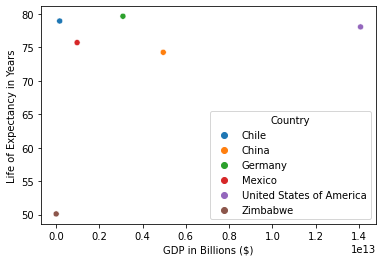

In [4]:
"""
Now I'm going to use a scatter plot to examine if 
there are any trends in the data between life expectancy and GDP.
"""

#First I need to get a mean of GDP and life expectancy across the years

pivot_table = pd.pivot_table(csv, values = ['GDP', 'YearsOfLife'], index = 'Country', aggfunc='mean')
print(pivot_table)

sns.scatterplot(data = pivot_table, x='GDP', y='YearsOfLife', hue = pivot_table.index)
plt.xlabel('GDP in Billions ($)')
plt.ylabel('Life of Expectancy in Years')
plt.show()




Lets make another plot, that tracks the changes in GDP accross the years of each country alongside changes in ages across the years of those countries.

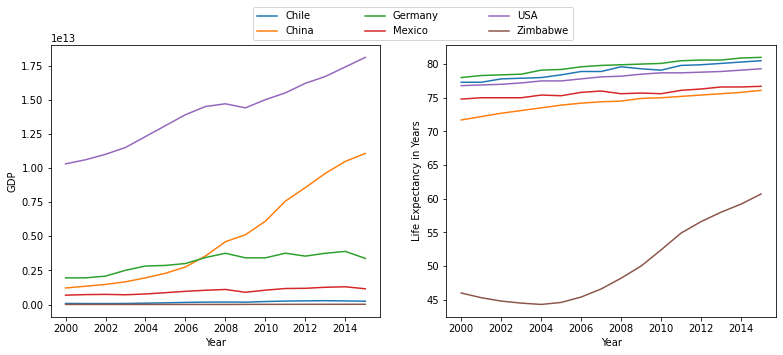

In [5]:
'''
Side by side line plots showing GDP/Life Expectancy across the years for each country
'''

figure = plt.figure(figsize=(13,5))
axs = plt.subplot(1,2,1)
gdp_plot = sns.lineplot(data = csv, x = 'Year', y="GDP", hue = "Country",legend = False)

plt.subplot(1,2,2)
life_plot = sns.lineplot(data = csv, x = "Year", y = 'YearsOfLife', hue = "Country", legend = False)

plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')
label = ['Chile','China','Germany', 'Mexico', 'USA', 'Zimbabwe' ]

plt.legend(labels = label, bbox_to_anchor = (-0.6,1,1,0.5), loc = 'lower left', ncol = 3, mode = 'expand')
'bbox_to_anchor argument accepts a tuple of 4 values (x,y,height width) where x and y are the lower left corner of the box'
plt.show()



This looks better. These two plots are self-explanatory. As we can see that there is a growth in life expectancy in all 5 countries trough 2000-2015. Among others, the most of change gets Zimbabwe. But on the first plot we do not see any dramatic change in GDP of Zimbabwe. There might be several reasons. 

**Explanation:** 
1. The growth of life expectancy can depend not only on GDP, the are a lot of variables such as political and other economic changes.
2. It might seem to you that there is no growth in GDP in left plot. **Most interesting part** - the plot is used for all 5 countries. Other 4 country's GDP growth "shadows" the GDP growth of Zimbabwe. Because the growth of GDP of other 4 countries are much more than the growth of GDP of Zimbabwe - e.g. from the left plot we can observe that in 2012, the GDPs of USA and Zimbabwe are little higher 0.0 and about 1.30 correspondingly. 

To make sure that this theory is true let's make another plot - Plot for only Zimbabwe for 2000-2015 years



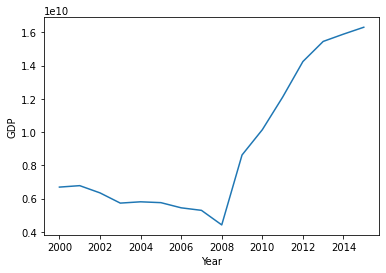

In [6]:
sns.lineplot(data = csv[csv.Country == "Zimbabwe"], x = "Year", y = 'GDP')

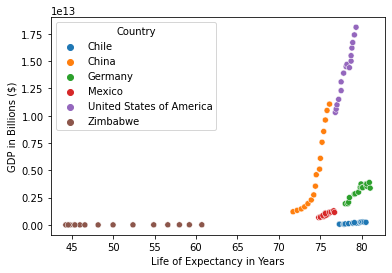

In [7]:
sns.scatterplot(data = csv, x = 'YearsOfLife', y = "GDP", hue = "Country")
plt.xlabel('Life of Expectancy in Years')
plt.ylabel('GDP in Billions ($)')
plt.show()

In [10]:
'''
Normalize the data
'''
from sklearn import preprocessing 

def normalize_gdp(csv):
    """Takes in life expectancy df and returns a list of normalized gdp values"""
    countries = csv.Country.unique()
    norm_gdp = []
    for country in countries:
        gdp = [csv[csv.Country == country].GDP] #normalize function expects 2D array, so make it one with extra square brackets
        normalized = preprocessing.normalize(gdp).tolist() # convert from array type to list
        norm_gdp.append(normalized)
    norm_gdp  = [x for sub in norm_gdp for j in sub for x in j] #flatten into 1D list
    return norm_gdp

csv['Norm_GDP'] = normalize_gdp(csv)

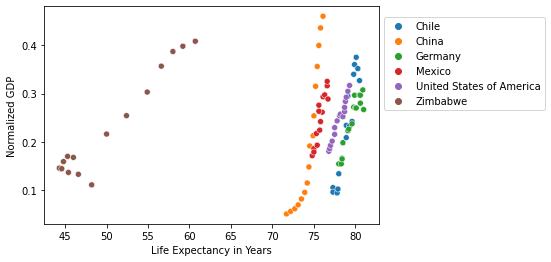

In [12]:
sns.scatterplot(data = csv, x = "YearsOfLife", y = 'Norm_GDP', hue = 'Country')
plt.legend(bbox_to_anchor = (1,0.5,1,1), loc = 'lower left', ncol = 1)
plt.xlabel('Life Expectancy in Years')
plt.ylabel('Normalized GDP')
plt.show()

From looking the plot above now we can see that GDP and life expectancy are associated in all the 5 countries. 


From this project, we learned that the dataset we have in our hands has strong correlation between GDP and life expectancy of different countries - in our case 5: USA, China, Zimbabwe, Chile, Germany and Mexico.